In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2 
import scipy.misc
from scipy.fftpack import dct, idct
import imageio
import io
import os
from PIL import Image
from scipy import fftpack
import urllib3
import IPython
import matplotlib.image as mpimg
import seaborn as sns
import csv

In [8]:
os.listdir('/Users/jm186072/Documents/Jeetendra/Projects/1Japan-Presales/data/b_ku_raw_data/B_ku_aku_1/')

['L9.csv',
 'L8.csv',
 'L15.csv',
 'L14.csv',
 'L13.csv',
 'L12.csv',
 'L10.csv',
 'L11.csv',
 'L5.csv',
 'L4.csv',
 'L6.csv',
 'L7.csv',
 'L3.csv',
 'L2.csv',
 'L1.csv']

In [9]:

# Importing the dataset
fileData = pd.read_csv('/Users/jm186072/Documents/Jeetendra/Projects/1Japan-Presales/data/b_ku_raw_data/B_ku_aku_1/L1.csv')
fileData.set_index(fileData.columns[0],inplace=True)

In [13]:
type(fileData)
fileData.index

Float64Index([  0.0,  0.02,  0.04,  0.06,  0.08,   0.1,  0.12,  0.14,  0.16,
               0.18,
              ...
              14.44, 14.46, 14.48,  14.5, 14.52, 14.54, 14.56, 14.58,  14.6,
              14.62],
             dtype='float64', name='Unnamed: 0', length=732)

In [68]:
###APPENDING THE Dummy dataset 
totalRow_Dataset= fileData.shape[0]
shapeOF_Dataset= 256*3
DummyRow_Dataset= int(shapeOF_Dataset - totalRow_Dataset)
x=np.zeros((36,2051), dtype=int)
#x=x.reshape(1,2052)
dummyDataframe= pd.DataFrame(x)

data= [ fileData , dummyDataframe ]
fileData = pd.concat(data) 
fileData= fileData.iloc[0: , 0:2051]

segment=[]
k = 256
j=0
st = 0
end = 256###########2051-2048===3 m issed column 
flag = True
#for i in range(fileData.shape[0]):



while flag == True:
   if k <= (fileData.shape[0]+ DummyRow_Dataset): 
    #if K<= (fileData.shape[0]+ DummyRow_Dataset):
        
       segment.append(fileData.iloc[j:k][fileData.columns[st:end]])
       j=j+256
       k = k+256
       
       flag = True
   else:
       #flag = False
       j = 0
       k = 256
       st = st+256
       end = end +256
       
   if fileData.columns[-1] in  fileData.columns[st : end]:
       flag = False      

/anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/pandas/core/indexes/api.py:107: RuntimeWarning: unorderable types: str() < int(), sort order is undefined for incomparable objects
  result = result.union(other)


In [69]:
len(segment)
print(segment[0].head())

             0     -0.02     -0.04     -0.06     -0.08      -0.1     -0.12  \
0.00 -0.039948 -0.388065 -0.067688 -0.081092 -0.102532 -0.132672 -0.264709   
0.02 -0.042340 -0.204777 -0.063131 -0.071552 -0.106296 -0.283599 -0.269963   
0.04 -0.044734 -0.211509 -0.063392 -0.068672 -0.114452 -0.284496 -0.273038   
0.06 -0.135480 -0.218243 -0.041514 -0.071134 -0.112517 -0.285248 -0.273500   
0.08 -0.142293 -0.220845 -0.038696 -0.073216 -0.106164 -0.286000 -0.272508   

         -0.14     -0.16     -0.18    ...        -4.92     -4.94     -4.96  \
0.00 -0.260943 -0.226739 -0.219416    ...    -0.011158 -0.012064 -0.015546   
0.02 -0.248943 -0.229630 -0.221444    ...    -0.011932 -0.013300 -0.015212   
0.04 -0.249290 -0.230008 -0.221547    ...    -0.012446 -0.013082 -0.015448   
0.06 -0.252403 -0.230383 -0.221646    ...    -0.012670 -0.013289 -0.644260   
0.08 -0.252475 -0.230755 -0.221165    ...    -0.013820 -0.014240 -0.017510   

         -4.98        -5     -5.02     -5.04     -5.06     -5.

In [70]:
for i in range(len(segment)):
    segment[i].to_csv('/Users/jm186072/Documents/Jeetendra/Projects/1Japan-Presales/data/segment_' + str(i) +'.csv')
    #print("Done saving %s file"  %i)

In [74]:
meansegment= []
for i in range(len(segment)):
    mean_=segment[i].mean()
    meansegment.append(mean_)


In [65]:
seg_avg=[]
for i in range(len(segment)):
    #print(i)
    seg_avg.append(np.mean(segment[i]))

In [75]:
type(meansegment)
df = pd.DataFrame(meansegment)
df.to_csv('/Users/jm186072/Documents/Jeetendra/Projects/1Japan-Presales/data/segmean3.csv', header=False, index=False)

In [54]:
#segavg = pd.DataFrame(seg_avg)
meansegment.to_csv('/Users/jm186072/Documents/Jeetendra/Projects/1Japan-Presales/data/segmean3.csv')



AttributeError: 'list' object has no attribute 'to_csv'

In [73]:
for i in range(len(segment)):
    for col in segment[i].columns:
        segment[i][col] = segment[i][col].apply(lambda x : 0 if x < (-1.5) else x )

In [100]:
x = pd.DataFrame()

In [101]:
x

""


In [99]:
#meansegment[0]


for i in range(meansegment):
    x.v = meansegment[i]
    


24

TypeError: 'builtin_function_or_method' object is not subscriptable

TypeError: Object does not appear to be a 8-bit string path or a Python file-like object

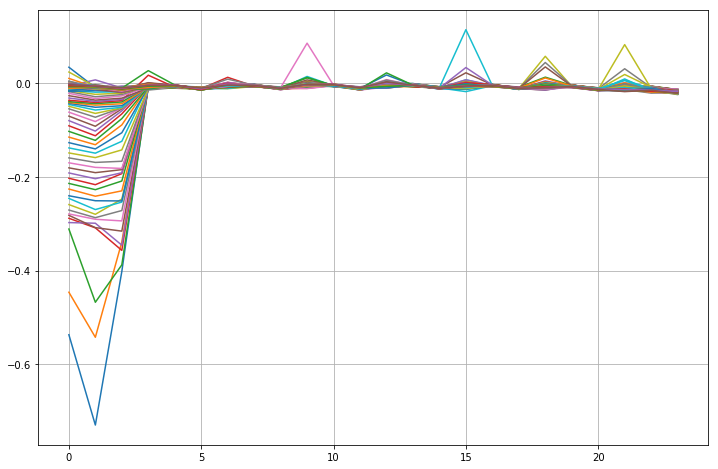

In [117]:
fig = plt.figure(figsize=(12, 8))
img = plt.plot(meansegment)
plt.grid(True)
#plt.legend(meansegment.index)
im = plt.imread(img.)
plt.imsave('plot.png',im)

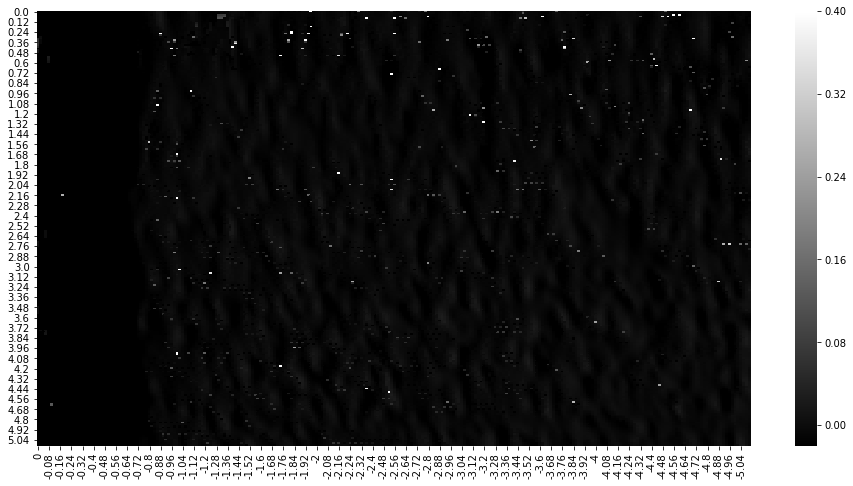

In [112]:
fig = plt.figure(figsize=(16, 8))

sns.heatmap(segment[0],cmap='gray',vmax=.4,vmin=-0.02)
sns.FacetGrid=True
#plt.imshow(segment[0],cmap='gray')
#plt.grid(True)
#plt.legend(meansegment.index)
#plt.show()

In [32]:
#print(segment[0].shape)
print(len(seg_avg))
#print(seg_avg)
print(type(seg_avg))
seg_avg = np.asmatrix(seg_avg)
seg_avg

24
<class 'numpy.matrixlib.defmatrix.matrix'>


matrix([[-0.58729015, -0.45309652, -0.31120043, ..., -0.00547546,
         -0.00222289, -0.00292663],
        [-0.7594766 , -0.54202651, -0.91948597, ..., -0.0066545 ,
         -0.00683623, -0.00666114],
        [-0.40174919, -0.39001476, -0.412414  , ..., -0.0119841 ,
         -0.01075423, -0.01000579],
        ...,
        [-0.00725754, -0.00611105, -0.00546979, ..., -0.01241098,
         -0.01392478, -0.01816339],
        [-0.00724103, -0.00741169, -0.00760355, ..., -0.01738677,
         -0.01507112, -0.01509378],
        [-0.0141577 , -0.01534171, -0.0164143 , ..., -0.01878425,
         -0.01786435, -0.02195831]])

In [ ]:
### Get the minimum and maximun value of each matrix 
      
maxValues=  []
minValues=  []
Quantile =  []

for i in range(len(segment)):
    min_max = segment[i]
    segmentMin=min_max.min()
    minValues.append(segmentMin.min())
    
    segmentMax= min_max.max()
    maxValues.append(segmentMax.max())

In [ ]:
#####ploat image ########


segmnetfirst = pd.read_csv('segment_firts.csv')
segmnetfirst.set_index(segmnetfirst.columns[0],inplace=True)


plt.figure(figsize=(12,8))

sns.heatmap(segmnetfirst,vmin=-0.02,vmax=0.04,cmap='gray')

segmnetfirst = pd.read_csv('segment_3rd.csv')
segmnetfirst.set_index(segmnetfirst.columns[0],inplace=True)


plt.figure(figsize=(12,8))

sns.heatmap(segmnetfirst,vmin=-0.02,vmax=0.04,cmap='gray')

       
maxValues=  []
minValues=  []
Quantile =  []

for i in range(len(segment_for_quantile)):
    min_max = np.array(segment_for_quantile[i])
    minValues.append(min_max.min())
    maxValues.append(min_max.max())
    df_Quantile = pd.DataFrame(segment_for_quantile[i])
    QuantileData=df_Quantile.quantile(q=0.25)
    Quantile.append(QuantileData)    
 